# SIS 2 (6 points)

Deadline for submission : **Monday 24th March : 23h50**

- The defense for this SIS will take place next week on **February 27 and March 1**.  
- During the defense, I will ask you to explain your solutions, and you may also receive additional questions.  
- If you are working in a group of two and are not from the same practical class, please contact me in advance to schedule your defense during office hours.  
- Unjustified absences will result in a zero for the assignment, even if you have completed and submitted your work.  


**THE CODE SHOULD BE RUN AND RESULTS NOT CLEARED**

---

## Exercise 1 : Gauss-Markov Assumptions

- **This exercise should be solved on PAPER (and photo or scan should be send).**

- Proofs should be DETAILED (otherwise they aren't proofs...). 





Consider the multi-linear model:

$
y_i = X \beta + \epsilon_i
$

where:
- $y_i$ is an $(n \times 1)$ vector of observations,
- $X$ is an $(n \times k)$ matrix of independent variables,
- $\beta$ is a $(k \times 1)$ vector of parameters,
- $\epsilon_i$ is an $(n \times 1)$ vector of error terms.

And the OLS estimator $\hat{\beta} = (X'X)^{-1} X'y$


---
#### 1. What does the Gauss-Markov theorem states ?

---
#### 2. Which assumptions do you need in order to show that $\hat{\beta}$ is identified? Show identification.

---
#### 3. Show that $\hat{\beta}$ is unbiased, 

i.e., $\mathbb{E}[\hat{\beta}] = \beta$.

---
#### 4. Prove that $\operatorname{Var}(\hat{\beta}) = \sigma^2 (X'X)^{-1}$.

---
#### 5. Efficiency of $\hat{\beta}$ and the Gauss-Markov Theorem  

Let $\tilde{\beta}$ be another **linear and unbiased** estimator of $\beta$. That is,  


$\tilde{\beta} = Ay$


for some matrix $A$ such that $\mathbb{E}[\tilde{\beta}] = \beta$.  

Using **Cochran’s theorem**, show that the variance of any other linear unbiased estimator $\tilde{\beta}$ is always at least as large as the variance of $\hat{\beta}$, the OLS estimator.  

Conclude that $\hat{\beta}$ is the **Best Linear Unbiased Estimator (BLUE)** according to the **Gauss-Markov theorem**.  

---
#### 6. Consistency of $\hat{\beta}$  

A sequence of estimators $\hat{\beta}_n$ is said to be **consistent** for $\beta$ if:  

$\hat{\beta}_n \xrightarrow{p} \beta \quad \text{(convergence in probability)}.$

This means that as the sample size increases, $\hat{\beta}_n$ gets arbitrarily close to $\beta$ with high probability.  

Using the **Law of Large Numbers (LLN)**, prove that the OLS estimator $\hat{\beta}$ is consistent under standard assumptions.  


---

## Exercise 2 : Linear Dependence and Rank of a Matrix

**Understanding Linear Dependence in Matrices**

In the context of a matrix, **linear dependence** refers to a situation where one or more columns (or rows) can be written as a linear combination of other columns (or rows). If all columns (or rows) are linearly independent, no such relationship exists.

A set of column vectors $ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_n $ in $ \mathbb{R}^m $ is **linearly dependent** if there exist scalars $ c_1, c_2, \dots, c_n $, **not all zero**, such that:

$$
c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2 + \dots + c_n \mathbf{v}_n = \mathbf{0}
$$

Equivalently, a matrix $ A $ with columns $ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_n $ is **linearly dependent** if there is a nontrivial solution to:

$$
A \mathbf{c} = \mathbf{0}
$$

where $ A = [\mathbf{v}_1 \, \mathbf{v}_2 \, \dots \, \mathbf{v}_n] $ and $ \mathbf{c} \neq \mathbf{0} $.

One way to determine if a set of vectors (columns or rows) is linearly dependent is by checking the **rank** of the matrix.

- The **rank** of a matrix $ A $ is the number of **linearly independent** columns (or rows).
- If $ \text{rank}(A) = n $ (the number of columns), the columns are **linearly independent**.
- If $ \text{rank}(A) < n $, then at least one column can be written as a linear combination of the others, meaning the columns are **linearly dependent**.

To compute the rank of a matrix, we can transform it into **Row Echelon Form (REF)** using **Gaussian Elimination**. The number of nonzero rows in REF corresponds to the rank:

$$
\text{rank}(A) = \text{number of nonzero rows in REF}
$$

If $ \text{rank}(A) < n $, the matrix has **linearly dependent columns**.


---

#### **Task: Implement Rank Calculation Using Gaussian Elimination**
Your goal is to implement a function that determines the rank of a matrix using Gaussian Elimination, without relying on external libraries (like NumPy or SciPy). 
Then, using your function, determine whether the given matrices are linearly independent.

### **Instructions**
1. Implement the function `rank_of_matrix(matrix: list[list[float]]) -> int` that:
   - Takes a matrix as a list of lists.
   - Performs Gaussian elimination to convert it into row echelon form.
   - Returns the rank (i.e., the number of nonzero rows in the echelon form).

2. Use your function to determine if the following matrices have **linearly independent columns**.

### **Example Matrices**
```python
matrix1 = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

matrix2 = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

matrix3 = [
    [1, 2, 3, 4],
    [4, 5, 6, 7],
    [7, 8, 9, 10],
    [1, 1, 1, 1]
]

In [ ]:
def rank_matrix(matrix):
    """Returns the rank of a matrix using Gaussian elimination (row echelon form)."""
    m = len(matrix)  # Number of rows
    n = len(matrix[0])  # Number of columns

    # Create a copy of the matrix to avoid modifying the original
    A = [row[:] for row in matrix]

    rank = 0
    for col in range(n):
        # Find the pivot row (the first nonzero element in the column)
        pivot_row = None
        for row in range(rank, m): #find nonzero element in the column
            if abs(A[row][col]) > 1e-10:  # To avoid floating-point precision errors
                pivot_row = row
                break
        
        if pivot_row is None:
            continue  # No pivot found, move to the next column

        # Swap the pivot row with the current rank row
        A[rank], A[pivot_row] = A[pivot_row], A[rank]

        # Normalize the pivot row
        pivot = A[rank][col]
        A[rank] = [x / pivot for x in A[rank]]

        # Eliminate lower rows in the current column
        for row in range(rank + 1, m):
            if abs(A[row][col]) > 1e-10:
                factor = A[row][col]
                A[row] = [A[row][i] - factor * A[rank][i] for i in range(n)]

        rank += 1  # Increase rank count

    return rank


# Example matrices
matrix1 = [[1, 2, 3], 
           [4, 5, 6], 
           [7, 8, 10]]
print("Rank of matrix1:", rank_matrix(matrix1))  

matrix2 = [[1, 2, 3], 
           [2, 4, 6], 
           [3, 6, 9]]
print("Rank of matrix2:", rank_matrix(matrix2))  

matrix3 = [
    [1, 2, 3, 4],
    [4, 5, 6, 7],
    [7, 8, 9, 10],
    [1, 1, 1, 1]
]
print("Rank of matrix3:", rank_matrix(matrix3))  


Rank of matrix1: 3
Rank of matrix2: 1
Rank of matrix3: 2


## Exercise 3 : Coding tasks

Consider the following dataset

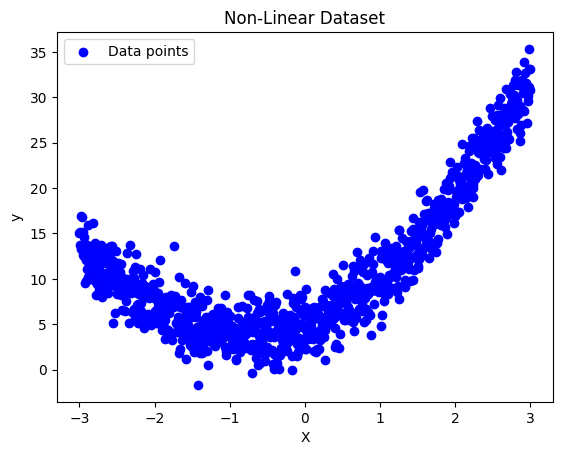

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.linspace(-3, 3, 1_000).reshape(-1, 1)
y = 2 * X**2 + 3 * X + 5 + np.random.normal(0, 2, X.shape)

plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-Linear Dataset')
plt.legend()
plt.show()


### **Step 1**

You should implement a custom regression class using the template below that does the following:
- Parameters: Accepts a flag to include a constant (intercept) or not.
- Fit: Estimate the OLS parameters using the formulas
$$\widehat a = \frac{\sum\limits_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum\limits_{i=1}^n (x_i - \bar{x})^2}, \quad 
    \widehat b = \bar{y} - \widehat a \bar{x}.$$
- Predict: Compute predictions using the estimated parameters.
- Residuals: Return the residuals, defined as:
$$ residuals = y − \widehat y $$

In [36]:
class CustomLinearRegression:
    def __init__(self, use_intercept=True):
        self.use_intercept = use_intercept
        self.coef_ = None
        self.intercept_ = 0
    
    def fit(self, X, y):
        # YOUR CODE GOES HERE 
        X = np.array(X)
        y = np.array(y)
        
        # Compute means
        x_mean = np.mean(X)
        y_mean = np.mean(y)
        
        # Compute slope (a)
        numerator = np.sum((X - x_mean) * (y - y_mean))
        denominator = np.sum((X - x_mean) ** 2)
        
        self.coef_ = numerator / denominator
        
        # Compute intercept (b) if required
        if self.use_intercept:
            self.intercept_ = y_mean - self.coef_ * x_mean
            pass
    def predict(self, X):
        # YOUR CODE GOES HERE 
        X = np.array(X)
        return self.coef_ * X + (self.intercept_ if self.use_intercept else 0)
        pass
    def residuals(self, X, y):
        # YOUR CODE GOES HERE 
        y_pred = self.predict(X)
        return y - y_pred
        pass

### Step 2
- Split the dataset into training and testing sets
- Use your custom linear regression class to fit the model

In [ ]:
# YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train custom linear regression model
model = CustomLinearRegression(use_intercept=True)
model.fit(X_train, y_train)

# Print model parameters
print("Slope (coef_):", model.coef_)
print("Intercept:", model.intercept_)


Slope (coef_): 2.9861444563463992
Intercept: 11.09041941328209


### Step 3
- Compute predictions for the test data.

In [56]:
# YOUR CODE GOES HERE 
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the predictions
print("Predicted values:", y_pred[:10])



Predicted values: [[11.47601765]
 [15.34993478]
 [15.40373918]
 [13.96895506]
 [ 9.50318948]
 [14.29178149]
 [13.35917181]
 [11.33253923]
 [17.53798057]
 [ 4.57111905]]


### Step 4

- Plot the actual data points and overlay the regression line from your custom model.

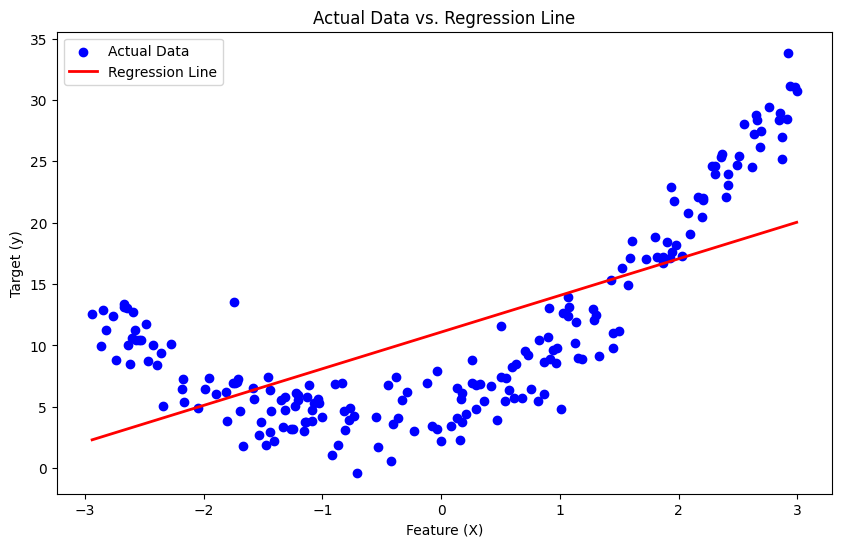

In [ ]:
# YOUR CODE GOES HERE

# Sort data for a smoother plot
sorted_indices = X_test[:, 0].argsort()  # Get sorted indices based on X values
X_sorted = X_test[sorted_indices]  # Sort X values
y_sorted = y_test[sorted_indices]  # Sort actual Y values
y_pred_sorted = y_pred[sorted_indices]  # Sort predicted Y values

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual Data")  # Scatter plot of actual data
plt.plot(X_sorted, y_pred_sorted, color="red", linewidth=2, label="Regression Line")  # Regression line

# Labels and title
plt.xlabel("Feature (X)")



plt.ylabel("Target (y)")
plt.title("Actual Data vs. Regression Line")
plt.legend()  # Show legend
plt.show()  # Display the plot


### Step 5
- Create a plot of residuals 
- Are the residuals randomly dispersed around zero?
- What does the pattern (or lack thereof) tell you about the appropriateness of a linear model for this dataset?

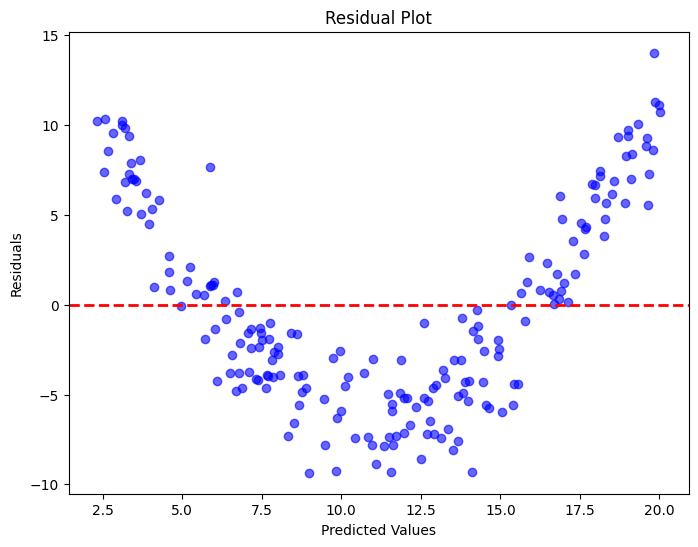

In [ ]:
# YOUR CODE GOES HERE

# Calculate residuals (difference between actual and predicted values)
residuals = y_test - y_predicted  

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_predicted, residuals, color='blue', alpha=0.6)  # Scatter plot of residuals
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Horizontal line at zero
plt.xlabel("Predicted Values")  # X-axis label
plt.ylabel("Residuals")  # Y-axis label
plt.title("Residual Plot")  # Plot title
plt.show()  # Display the plot


### Step 6

- Use sklearn to implement Polynomial Regression and fit it on the same dataset.
- Compare the results.

Linear Regression MSE: 31.5913
Polynomial Regression MSE: 3.8084


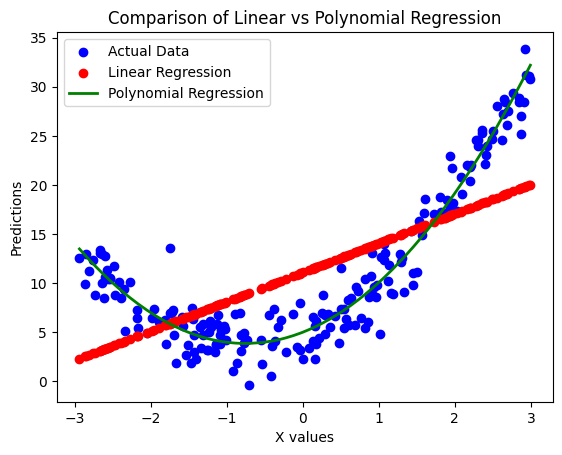

In [59]:
# YOUR CODE GOES HERE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Transform features into polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_test_poly = poly.transform(X_test)  # Transform test data

# Train the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly_reg.predict(X_test_poly)  # Polynomial regression predictions

# Calculate MSE (Mean Squared Error)
mse_linear = mean_squared_error(y_test, y_pred)  # Linear regression error
mse_poly = mean_squared_error(y_test, y_pred_poly)  # Polynomial regression error

print(f"Linear Regression MSE: {mse_linear:.4f}")
print(f"Polynomial Regression MSE: {mse_poly:.4f}")

# Plot actual data and regression models
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # Scatter plot of actual data
plt.scatter(X_test, y_pred, color='red', label='Linear Regression')  # Linear regression predictions

# Plot polynomial regression as a smooth curve
sorted_indices = np.argsort(X_test.ravel())  # Sort X values for smooth plotting
X_test_sorted = X_test.ravel()[sorted_indices]  
y_pred_poly_sorted = y_pred_poly[sorted_indices]  

plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', label='Polynomial Regression', linewidth=2)

# Labels and title
plt.xlabel("X values")
plt.ylabel("Predictions")
plt.legend()  # Show legend
plt.title("Comparison of Linear vs Polynomial Regression")
plt.show()  # Display the plot


### Final Discussion

- Discuss how the linear model may underfit the data because it cannot capture the inherent non-linear relationships
- Explain how introducing polynomial terms leads to a better fit

In [ ]:
A linear regression model might not work well if the relationship in the data isn’t a straight line. 
You can see this in the residual plot—if the points form a curve instead of being scattered randomly, it means the model is missing important patterns.  

Polynomial regression helps by adding extra features (like squared terms), so the model can better follow the shape of the data. 
This usually makes predictions more accurate and lowers the error. 
But if the polynomial is too complex, the model might overfit, meaning it learns random noise instead of real trends.  

From the results, it looks like polynomial regression fits the data better because it captures the true pattern more accurately.